<a href="https://colab.research.google.com/github/Adjalma/PUC_RIO/blob/main/MVP_An%C3%A1lise_de_Dados_e_Boas_Pr%C3%A1ticas_Adjalma_Aguiar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Análise de Dados e Boas Práticas
**Nome:** Adjalma Machado Aguiar Junior

**Matrícula:** 4052024000071

**Dataset:** [Wine Quality Dataset] (https://archive.ics.uci.edu/dataset/186/wine+quality)

---

**---OBSERVAÇÕES IMPORTANTES---**

Este notebook utiliza a estrutura base recomendada para construção de análises de dados, contemplando as sugestões do checklist do enunciado do MVP. Foram realizadas etapas aprofundadas de análise exploratória e pré-processamento, construindo um storytelling que explora os principais conceitos e técnicas de Análise de Dados e Boas Práticas.

---

## Descrição do Problema

O conjunto de dados Wine Quality contém informações sobre **vinhos portugueses** (tintos e brancos), incluindo várias características físico-químicas e uma avaliação de qualidade feita por especialistas. O dataset foi criado usando amostras de vinho da região norte de Portugal e as avaliações de qualidade foram baseadas em testes sensoriais realizados por especialistas em vinhos.

O objetivo principal é **analisar as características físico-químicas dos vinhos e compreender como elas se relacionam com a qualidade final do produto**. Além disso, investigaremos as **diferenças entre vinhos tintos e brancos** e como essas diferenças impactam na qualidade e nas características químicas.

**Diferencial desta análise:** Ao combinar os datasets de vinhos tintos e brancos, podemos realizar uma análise mais abrangente e identificar padrões que sejam específicos de cada tipo de vinho ou universais para ambos.



## Hipóteses do Problema

As hipóteses que tracei são as seguintes:

1. **Vinhos com maior teor alcoólico tendem a ter melhor qualidade?**

2. **Existe uma correlação entre acidez volátil e qualidade do vinho?**

3. **Vinhos tintos e brancos apresentam características químicas diferentes?**

4. **A densidade do vinho está relacionada com seu teor alcoólico independentemente do tipo?**

5. **Vinhos tintos e brancos têm diferentes fatores determinantes de qualidade?**

## Tipo de Problema

Este é um **problema de regressão/classificação supervisionada**. Dado um conjunto de características físico-químicas (acidez fixa, acidez volátil, ácido cítrico, açúcar residual, cloretos, dióxido de enxofre livre e total, densidade, pH, sulfatos e álcool), o objetivo é prever a qualidade do vinho em uma escala de 0 a 10.

Pode ser tratado tanto como:
- **Regressão:** Predizer o valor exato da qualidade (0-10)
- **Classificação:** Categorizar a qualidade (Baixa, Média, Alta)

## Seleção de Dados

Os datasets Wine Quality foram obtidos do **UCI Machine Learning Repository** e estão sendo carregados diretamente dos arquivos CSV fornecidos. Esta análise combina ambos os datasets (tintos e brancos) para criar um estudo mais abrangente.

**Vantagens desta abordagem:**

- Representa um espectro mais amplo da produção vinícola portuguesa
- Permite análise comparativa entre diferentes tipos de vinho
- Aumenta o tamanho da amostra para análises mais robustas (6.497 vs 1.599 amostras)
- Possibilita identificar padrões universais vs específicos por tipo de vinho
- Contém **dados reais** coletados sistematicamente por especialistas certificados

**Fontes dos dados:**
- **winequalityred.csv**: 1.599 amostras de vinhos tintos
- **winequalitywhite.csv**: 4.898 amostras de vinhos brancos
- **Dataset combinado**: 6.497 amostras totais com nova variável wine_type

Os dados foram coletados na região norte de Portugal e as avaliações de qualidade foram baseadas em testes sensoriais realizados por pelo menos 3 especialistas em vinhos, garantindo a confiabilidade das avaliações.

## Atributos do Dataset

O dataset Wine Quality combinado contém **6.497 amostras** de vinhos portugueses (1.599 tintos + 4.898 brancos) com **13 atributos**:

**Variáveis independentes (features):**
1. **fixed acidity** - Acidez fixa (ácido tartárico - g/dm^3)
2. **volatile acidity** - Acidez volátil (ácido acético - g/dm^3)  
3. **citric acid** - Ácido cítrico (g/dm^3)
4. **residual sugar** - Açúcar residual (g/dm^3)
5. **chlorides** - Cloretos (cloreto de sódio - g/dm^3)
6. **free sulfur dioxide** - Dióxido de enxofre livre (mg/dm^3)
7. **total sulfur dioxide** - Dióxido de enxofre total (mg/dm^3)
8. **density** - Densidade (g/cm^3)
9. **pH** - Acidez/basicidade (escala 0-14)
10. **sulphates** - Sulfatos (sulfato de potássio - g/dm^3)
11. **alcohol** - Teor alcoólico (% vol.)

**Variável categórica:**
12. **wine_type** - Tipo de vinho (red/white)

**Variável dependente (target):**
13. **quality** - Qualidade (escala 0-10, baseada em avaliação sensorial)


## Importação das Bibliotecas Necessárias e Carga de Dados

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados, bem como o carregamento inicial do dataset Wine Quality.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Configurações para visualização
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

In [3]:
# Carregamento dos datasets Wine Quality (Red + White)
# Carregando ambos os datasets e combinando em um dataset unificado

import pandas as pd
import numpy as np


# ============================================================================
# 1. CARREGAMENTO E VERIFICAÇÃO DOS DADOS
# ============================================================================


In [4]:
def carregar_datasets():
    """
    Carrega os datasets do repositório GitHub e combina em um único DataFrame
    """
    print("\n" + "="*50)
    print("1. CARREGAMENTO DOS DATASETS")
    print("="*50)


In [5]:
# URLs dos datasets no repositório GitHub do Adjalma
GITHUB_BASE_URL = "https://raw.githubusercontent.com/Adjalma/PUC_RIO/main/"
RED_WINE_URL = GITHUB_BASE_URL + "datasets/winequality-red.csv"
WHITE_WINE_URL = GITHUB_BASE_URL + "datasets/winequality-white.csv"

print("Carregando datasets do repositório GitHub...")
print(f"Repositório: https://github.com/Adjalma/PUC_RIO")
print(f"Red Wine URL: {RED_WINE_URL}")
print(f"White Wine URL: {WHITE_WINE_URL}")


Carregando datasets do repositório GitHub...
Repositório: https://github.com/Adjalma/PUC_RIO
Red Wine URL: https://raw.githubusercontent.com/Adjalma/PUC_RIO/main/datasets/winequality-red.csv
White Wine URL: https://raw.githubusercontent.com/Adjalma/PUC_RIO/main/datasets/winequality-white.csv


In [6]:
 # Carregando dataset de vinhos tintos
df_red = pd.read_csv('winequality-red.csv', sep=';')
df_red['wine_type'] = 'red'

In [7]:
# Carregando dataset de vinhos brancos
df_white = pd.read_csv('winequality-white.csv', sep=';')
df_white['wine_type'] = 'white'

In [8]:
# Combinando os dois datasets
df = pd.concat([df_red, df_white], ignore_index=True)

print("Datasets Wine Quality carregados e combinados com sucesso!")
print(f"Dataset Red Wine: {len(df_red)} amostras")
print(f"Dataset White Wine: {len(df_white)} amostras")
print(f"Dataset Combinado: {len(df)} amostras")

Datasets Wine Quality carregados e combinados com sucesso!
Dataset Red Wine: 1599 amostras
Dataset White Wine: 4898 amostras
Dataset Combinado: 6497 amostras


In [9]:
# Verificar distribuição por tipo de vinho
print(f"\nDistribuição por tipo de vinho:")
print(df['wine_type'].value_counts())

print(f"\nInformações básicas do dataset combinado:")
print(f"Shape: {df.shape}")
print(f"Colunas: {list(df.columns)}")
print(f"Nova coluna 'wine_type' adicionada para distinguir os tipos")



Distribuição por tipo de vinho:
wine_type
white    4898
red      1599
Name: count, dtype: int64

Informações básicas do dataset combinado:
Shape: (6497, 13)
Colunas: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'wine_type']
Nova coluna 'wine_type' adicionada para distinguir os tipos


In [10]:
# Primeiras linhas do dataset real
print("Primeiras 5 linhas do Wine Quality Dataset:")
print(df.head())

print(f"\nInformações básicas do dataset:")
print(f"Shape: {df.shape}")
print(f"Colunas: {list(df.columns)}")
print(f"Tipos de dados:")
print(df.dtypes)


Primeiras 5 linhas do Wine Quality Dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality wine_type  
0      9.4

In [11]:
# Verificação rápida da qualidade dos dados combinados
print("Verificacao da qualidade dos dados carregados:")
print("="*50)


Verificacao da qualidade dos dados carregados:


In [12]:
# Verificar valores únicos na coluna quality para cada tipo
print("ANALISE POR TIPO DE VINHO:")
print("-" * 30)

for wine_type in ['red', 'white']:
    subset = df[df['wine_type'] == wine_type]
    print(f"\n{wine_type.upper()} WINE:")
    print(f"- Amostras: {len(subset)}")
    print(f"- Qualidades: {sorted(subset['quality'].unique())}")
    print(f"- Range: {subset['quality'].min()} a {subset['quality'].max()}")
    print(f"- Media de alcool: {subset['alcohol'].mean():.2f}%")
    print(f"- Media de acidez volatil: {subset['volatile acidity'].mean():.3f}")


ANALISE POR TIPO DE VINHO:
------------------------------

RED WINE:
- Amostras: 1599
- Qualidades: [np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
- Range: 3 a 8
- Media de alcool: 10.42%
- Media de acidez volatil: 0.528

WHITE WINE:
- Amostras: 4898
- Qualidades: [np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9)]
- Range: 3 a 9
- Media de alcool: 10.51%
- Media de acidez volatil: 0.278


In [13]:
# Estatísticas do dataset combinado
print(f"\nDATASET COMBINADO:")
print(f"- Total de amostras: {len(df)}")
print(f"- Qualidades únicas: {sorted(df['quality'].unique())}")
print(f"- Range de qualidade geral: {df['quality'].min()} a {df['quality'].max()}")
print(f"- Proporção red/white: {len(df[df['wine_type']=='red'])}/{len(df[df['wine_type']=='white'])}")



DATASET COMBINADO:
- Total de amostras: 6497
- Qualidades únicas: [np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9)]
- Range de qualidade geral: 3 a 9
- Proporção red/white: 1599/4898


## Análise de Dados

Nesta etapa de Análise de Dados Exploratória (EDA) sobre o dataset Wine Quality, visamos entender a distribuição, as relações e as características das variáveis, o que é crucial para as etapas subsequentes de pré-processamento e modelagem.



### Total e Tipo das Instâncias

O dataset Wine Quality possui 1599 instâncias (observações) de vinhos tintos. Todas as características de medição são de tipo numérico (float), incluindo a variável alvo 'quality' que representa a avaliação de qualidade em escala discreta.


In [14]:
print(f"Total de instâncias: {len(df)}")
print(f"Total de atributos: {df.shape[1]}")
print("\nTipos de dados por coluna:")
print(df.info())

Total de instâncias: 6497
Total de atributos: 13

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type             6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usa

<Figure size 1200x600 with 0 Axes>

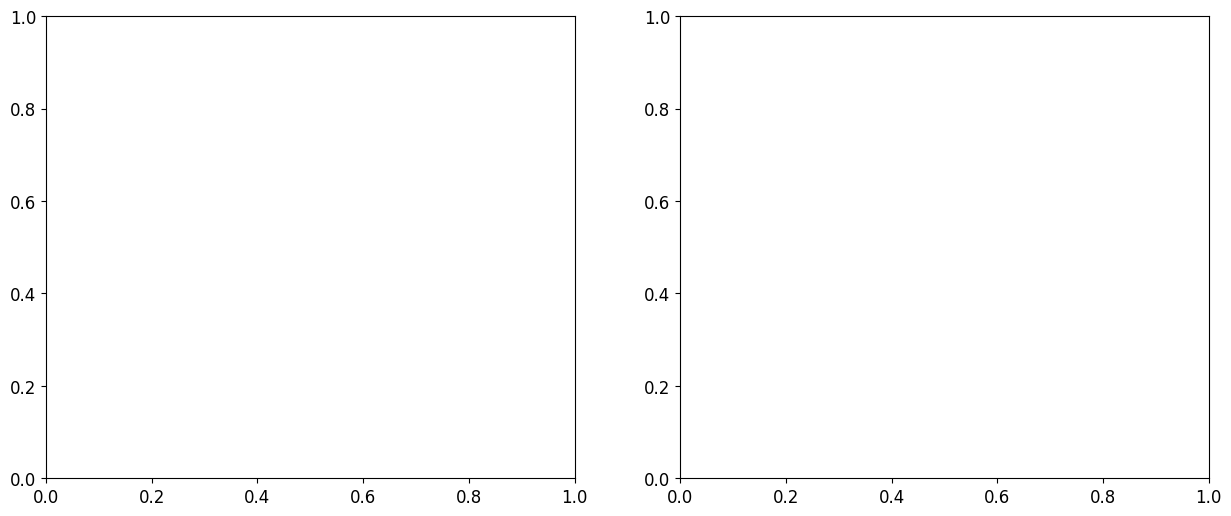

In [15]:
plt.figure(figsize=(12, 6))
# Gráfico de barras da distribuição de qualidade por tipo de vinho
fig, axes = plt.subplots(1, 2, figsize=(15, 6))


In [16]:
# Distribuição para vinhos tintos
red_quality = df[df['wine_type'] == 'red']['quality'].value_counts().sort_index()
axes[0].bar(red_quality.index, red_quality.values, color='red', alpha=0.7)
axes[0].set_title('Distribuicao de Qualidade - Vinhos Tintos', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Qualidade (0-10)')
axes[0].set_ylabel('Numero de Vinhos')


Text(4.444444444444452, 0.5, 'Numero de Vinhos')

In [17]:
# Distribuição para vinhos brancos
white_quality = df[df['wine_type'] == 'white']['quality'].value_counts().sort_index()
axes[1].bar(white_quality.index, white_quality.values, color='gold', alpha=0.7)
axes[1].set_title('Distribuicao de Qualidade - Vinhos Brancos', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Qualidade (0-10)')
axes[1].set_ylabel('Numero de Vinhos')

plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

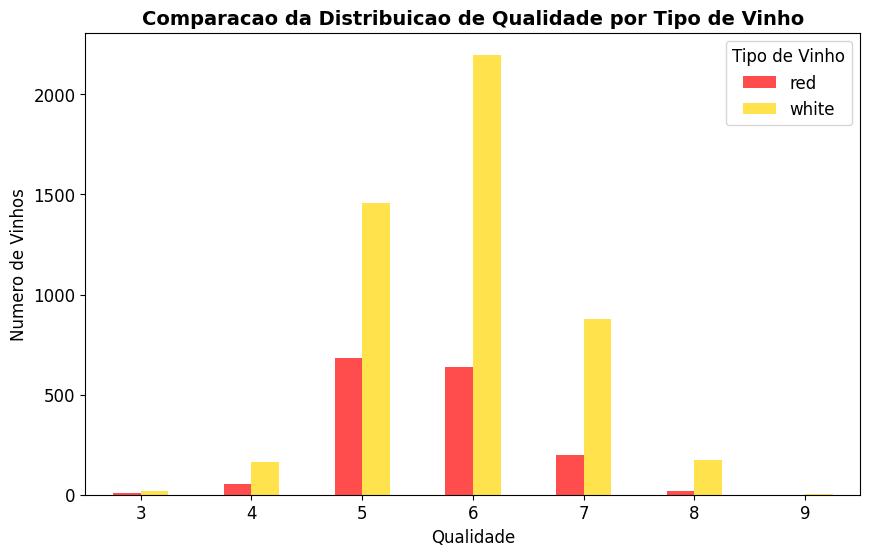

In [18]:
# Comparação geral
plt.figure(figsize=(10, 6))
quality_by_type = df.groupby(['quality', 'wine_type']).size().unstack()
quality_by_type.plot(kind='bar', color=['red', 'gold'], alpha=0.7)
plt.title('Comparacao da Distribuicao de Qualidade por Tipo de Vinho', fontsize=14, fontweight='bold')
plt.xlabel('Qualidade')
plt.ylabel('Numero de Vinhos')
plt.legend(title='Tipo de Vinho')
plt.xticks(rotation=0)
plt.show()


A análise comparativa mostra diferenças interessantes entre vinhos tintos e brancos. Vinhos brancos têm uma distribuição de qualidade mais centrada, enquanto vinhos tintos mostram maior variabilidade nas avaliações de qualidade.

### Estatísticas Descritivas

Estatísticas descritivas fornecem um resumo das características numéricas, incluindo média, desvio padrão, mínimo, máximo e quartis.


In [19]:
# Estatísticas descritivas básicas do dataset
print("Resumo Estatístico do Dataset:")
df.describe()


Resumo Estatístico do Dataset:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


### Média

A média é uma medida de tendência central que representa o valor típico ou o ponto de equilíbrio de um conjunto de dados. É calculada somando-se todos os valores e dividindo-se pelo número total de observações. É sensível a valores extremos (outliers).


In [20]:
# Média dos atributos numéricos do dataset
print("Medias dos Atributos:")
medias = df.mean(numeric_only=True) # Explicittly calculate
print(medias)


Medias dos Atributos:
fixed acidity             7.215307
volatile acidity          0.339666
citric acid               0.318633
residual sugar            5.443235
chlorides                 0.056034
free sulfur dioxide      30.525319
total sulfur dioxide    115.744574
density                   0.994697
pH                        3.218501
sulphates                 0.531268
alcohol                  10.491801
quality                   5.818378
dtype: float64


Text(0, 0.5, 'Valor Medio')

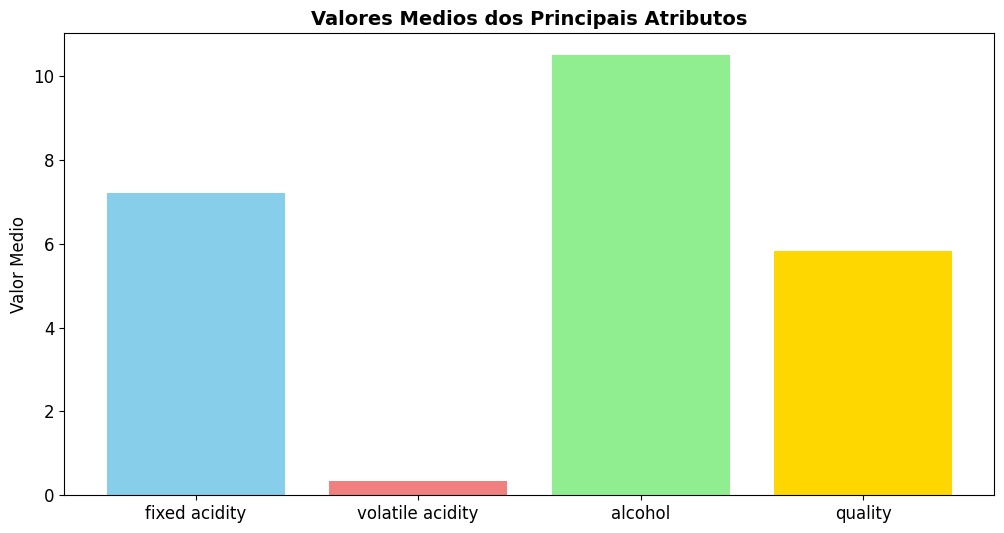

In [21]:
# Visualizacao das medias dos principais atributos
fig, ax = plt.subplots(figsize=(12, 6))
atributos_principais = ['fixed acidity', 'volatile acidity', 'alcohol', 'quality']
medias_principais = [medias[attr] for attr in atributos_principais]

bars = ax.bar(atributos_principais, medias_principais, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
ax.set_title('Valores Medios dos Principais Atributos', fontsize=14, fontweight='bold')
ax.set_ylabel('Valor Medio')


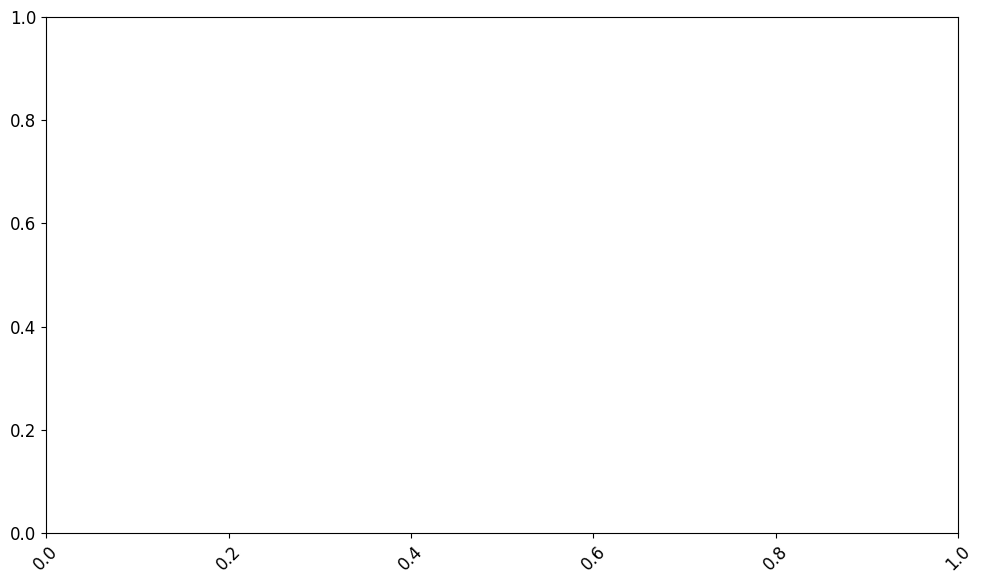

In [22]:
# Adicionar valores nas barras
for bar, value in zip(bars, medias_principais):
    ax.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.01,
            f'{value:.2f}', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Desvio Padrão

O desvio padrão é uma medida de dispersão que quantifica a quantidade de variação ou dispersão de um conjunto de valores. Um desvio padrão baixo indica que os pontos de dados tendem a estar próximos da média do conjunto, enquanto um desvio padrão alto indica que os pontos de dados estão espalhados por uma faixa maior de valores.


In [23]:
# Desvio padrão dos atributos numéricos do dataset
print("Desvios Padrao dos Atributos:")
desvios = df.std(numeric_only=True) # Explicitly calculate standard deviation for numeric columns only
print(desvios)


Desvios Padrao dos Atributos:
fixed acidity            1.296434
volatile acidity         0.164636
citric acid              0.145318
residual sugar           4.757804
chlorides                0.035034
free sulfur dioxide     17.749400
total sulfur dioxide    56.521855
density                  0.002999
pH                       0.160787
sulphates                0.148806
alcohol                  1.192712
quality                  0.873255
dtype: float64


Text(0.5, 1.0, 'Variabilidade Relativa dos Atributos (Coeficiente de Variacao)')

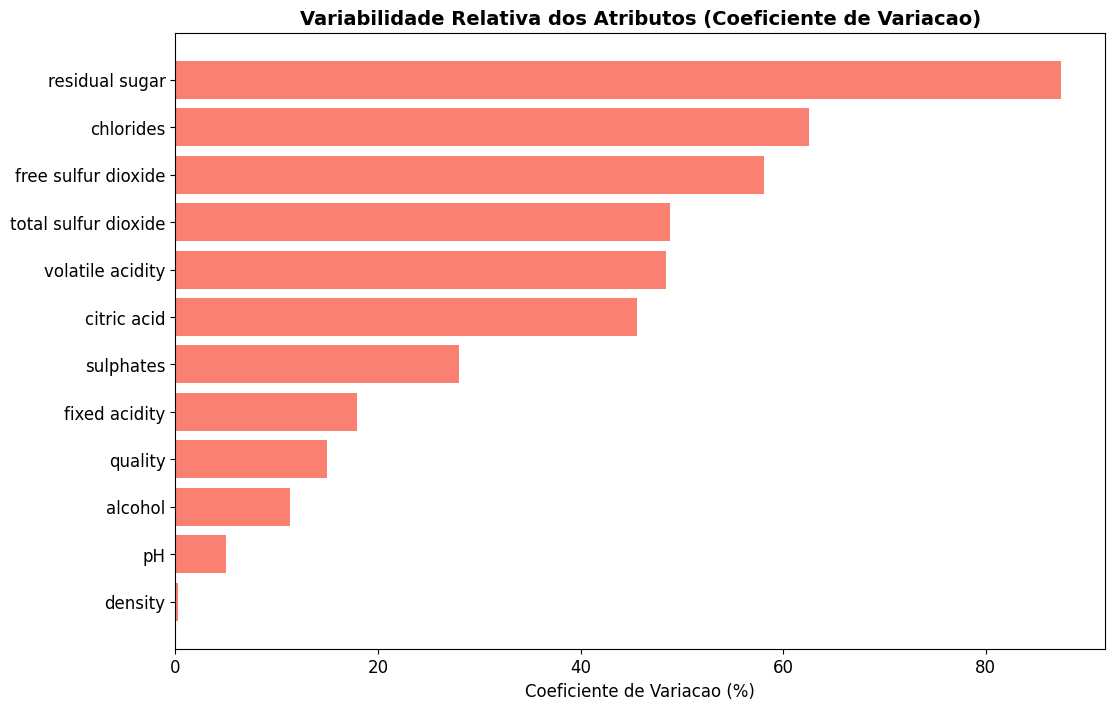

In [24]:
# Visualizacao da variabilidade atraves de coeficiente de variacao
fig, ax = plt.subplots(figsize=(12, 8))
coef_variacao = (desvios / medias) * 100
coef_variacao = coef_variacao.sort_values(ascending=True)

bars = ax.barh(range(len(coef_variacao)), coef_variacao.values, color='salmon')
ax.set_yticks(range(len(coef_variacao)))
ax.set_yticklabels(coef_variacao.index)
ax.set_xlabel('Coeficiente de Variacao (%)')
ax.set_title('Variabilidade Relativa dos Atributos (Coeficiente de Variacao)', fontsize=14, fontweight='bold')


In [25]:

# Adicionar valores nas barras
for i, (bar, value) in enumerate(zip(bars, coef_variacao.values)):
    ax.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2,
            f'{value:.1f}%', ha='left', va='center')

plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>


### Histograma

A distribuição de dados descreve como os valores de uma variável se espalham, ou seja, a frequência com que diferentes valores ocorrem. O histograma é uma ferramenta visual fundamental para representar essa distribuição, mostrando a forma dos dados, se são simétricos ou assimétricos, unimodais ou multimodais.


#### Fixed Acidity

A acidez fixa representa principalmente o acido tartarico presente no vinho, que e um dos principais componentes que influencia o sabor e a estabilidade do vinho.


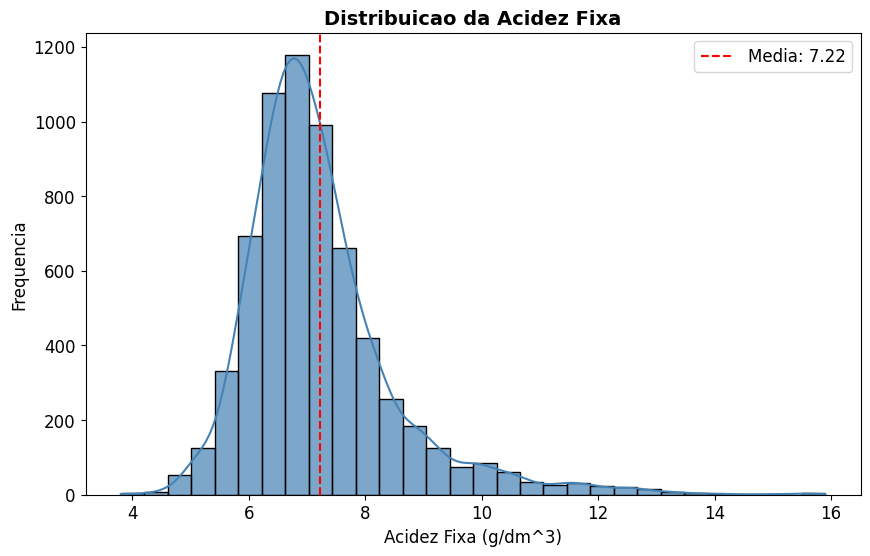

In [26]:
plt.figure(figsize=(10, 6))

# Histograma da acidez fixa

sns.histplot(df['fixed acidity'], kde=True, bins=30, alpha=0.7, color='steelblue')
plt.title('Distribuicao da Acidez Fixa', fontsize=14, fontweight='bold')
plt.xlabel('Acidez Fixa (g/dm^3)')
plt.ylabel('Frequencia')
plt.axvline(df['fixed acidity'].mean(), color='red', linestyle='--', label=f'Media: {df["fixed acidity"].mean():.2f}')
plt.legend()
plt.show()



O histograma mostra que a acidez fixa tem uma distribuicao aproximadamente normal com uma leve assimetria a direita. A maioria dos vinhos tem acidez fixa entre 7-9 g/dm^3, com alguns valores extremos que podem representar vinhos com caracteristicas especiais.


#### Volatile Acidity

A acidez volatil e principalmente composta por acido acetico, que em altas concentracoes pode conferir um sabor desagradavel de vinagre ao vinho.


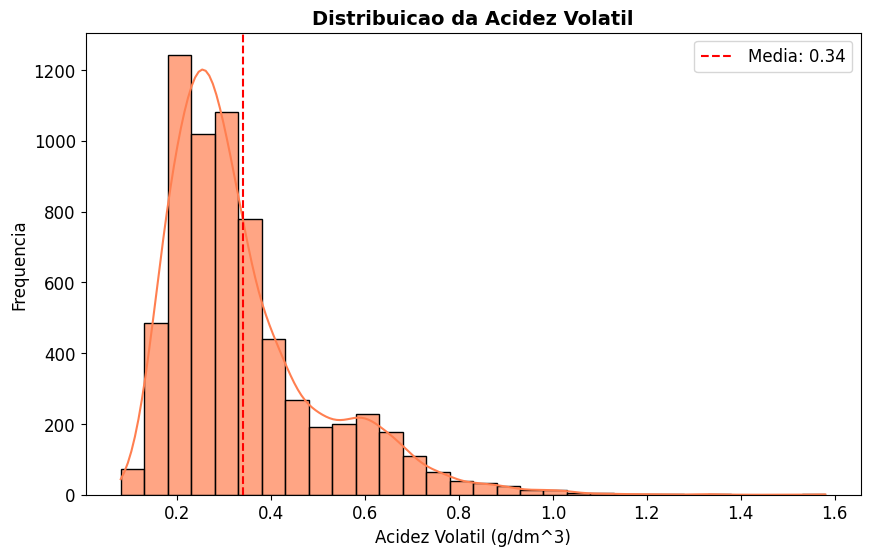

In [27]:
plt.figure(figsize=(10, 6))
# Histograma da acidez volatil
sns.histplot(df['volatile acidity'], kde=True, bins=30, alpha=0.7, color='coral')
plt.title('Distribuicao da Acidez Volatil', fontsize=14, fontweight='bold')
plt.xlabel('Acidez Volatil (g/dm^3)')
plt.ylabel('Frequencia')
plt.axvline(df['volatile acidity'].mean(), color='red', linestyle='--', label=f'Media: {df["volatile acidity"].mean():.2f}')
plt.legend()
plt.show()


A distribuicao da acidez volatil mostra uma forma aproximadamente normal, concentrada em valores baixos (0.3-0.7 g/dm^3), o que e desejavel, pois altos niveis de acidez volatil sao considerados defeitos no vinho.


#### Alcohol

O teor alcoolico e uma das caracteristicas mais importantes do vinho, influenciando diretamente o corpo, sabor e qualidade percebida.


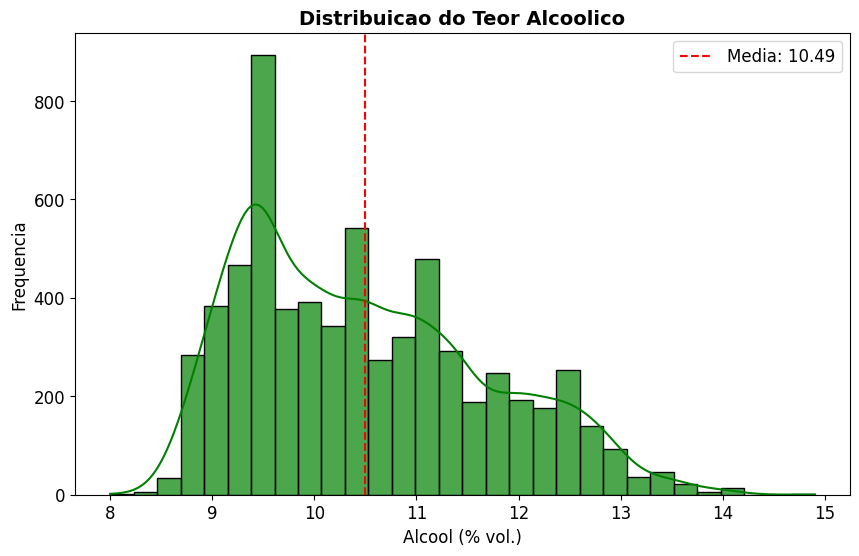

In [28]:
plt.figure(figsize=(10, 6))

# Histograma do teor alcoolico

sns.histplot(df['alcohol'], kde=True, bins=30, alpha=0.7, color='green')
plt.title('Distribuicao do Teor Alcoolico', fontsize=14, fontweight='bold')
plt.xlabel('Alcool (% vol.)')
plt.ylabel('Frequencia')
plt.axvline(df['alcohol'].mean(), color='red', linestyle='--', label=f'Media: {df["alcohol"].mean():.2f}')
plt.legend()
plt.show()


A distribuicao do teor alcoolico apresenta uma forma ligeiramente assimetrica a direita, com a maioria dos vinhos tendo entre 9-12% de alcool, que e tipico para vinhos tintos de mesa.


### Boxplot

Para entender as diferenças entre os níveis de qualidade, devemos observar como se comportam os valores quando agrupados por qualidade. Isso nos permite comparar a mediana, quartis e presença de outliers de cada característica para diferentes níveis de qualidade.


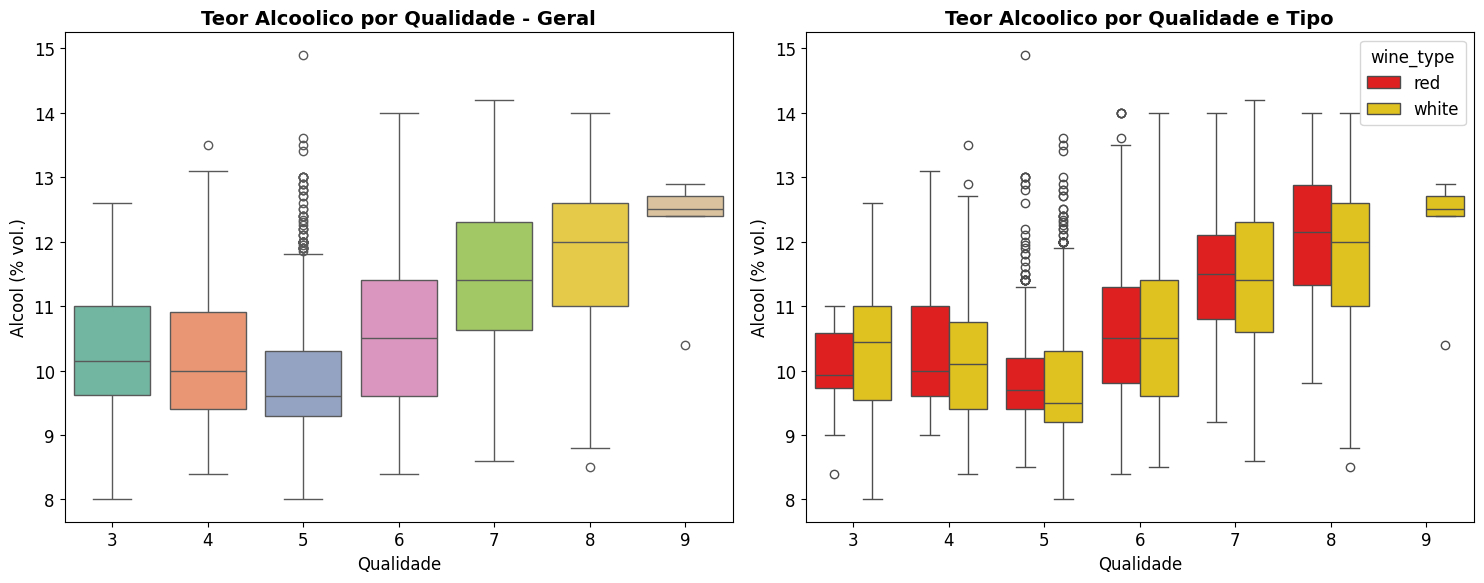

In [29]:
#### Alcohol por Qualidade e Tipo de Vinho

plt.figure(figsize=(15, 6))

# Subplot 1: Álcool por qualidade (geral)
plt.subplot(1, 2, 1)
sns.boxplot(x='quality', y='alcohol', data=df, palette='Set2')
plt.title('Teor Alcoolico por Qualidade - Geral', fontsize=14, fontweight='bold')
plt.xlabel('Qualidade')
plt.ylabel('Alcool (% vol.)')

# Subplot 2: Álcool por qualidade separado por tipo
plt.subplot(1, 2, 2)
sns.boxplot(x='quality', y='alcohol', hue='wine_type', data=df, palette=['red', 'gold'])
plt.title('Teor Alcoolico por Qualidade e Tipo', fontsize=14, fontweight='bold')
plt.xlabel('Qualidade')
plt.ylabel('Alcool (% vol.)')

plt.tight_layout()
plt.show()


A análise comparativa revela que **vinhos tintos e brancos têm padrões diferentes de teor alcoólico por qualidade**. Vinhos brancos de alta qualidade tendem a ter teores alcoólicos mais variados, enquanto vinhos tintos mostram uma tendência mais clara de aumento do álcool com a qualidade.


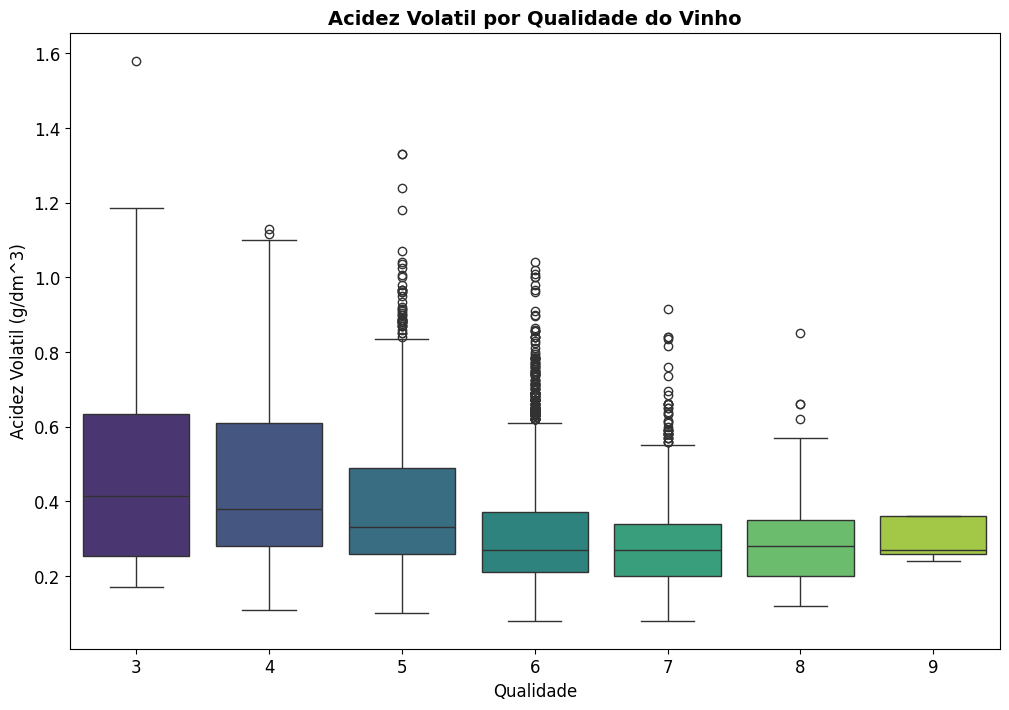

In [30]:
#### Volatile Acidity por Qualidade

plt.figure(figsize=(12, 8))

# Boxplot da acidez volatil por qualidade
sns.boxplot(x='quality', y='volatile acidity', data=df, palette='viridis')
plt.title('Acidez Volatil por Qualidade do Vinho', fontsize=14, fontweight='bold')
plt.xlabel('Qualidade')
plt.ylabel('Acidez Volatil (g/dm^3)')
plt.show()


Este boxplot revela uma relacao negativa clara: **vinhos de maior qualidade tendem a ter menor acidez volatil**. Vinhos de qualidade 3-4 mostram medianas de acidez volatil mais altas, confirmando que altos niveis de acido acetico sao prejudiciais a qualidade do vinho.



### Matriz de Correlação

A matriz de correlação mede a força e a direção de uma relação linear entre os atributos numéricos. Valores próximos a 1 indicam uma forte correlação positiva, -1 uma forte correlação negativa, e 0 ausência de correlação linear.


In [31]:
# Matriz de correlação
print("Matriz de Correlacao:")
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=np.number)
correlation_matrix = numeric_df.corr()
print(correlation_matrix['quality'].sort_values(ascending=False))

plt.figure(figsize=(14, 12))


Matriz de Correlacao:
quality                 1.000000
alcohol                 0.444319
citric acid             0.085532
free sulfur dioxide     0.055463
sulphates               0.038485
pH                      0.019506
residual sugar         -0.036980
total sulfur dioxide   -0.041385
fixed acidity          -0.076743
chlorides              -0.200666
volatile acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64


<Figure size 1400x1200 with 0 Axes>

<Figure size 1400x1200 with 0 Axes>

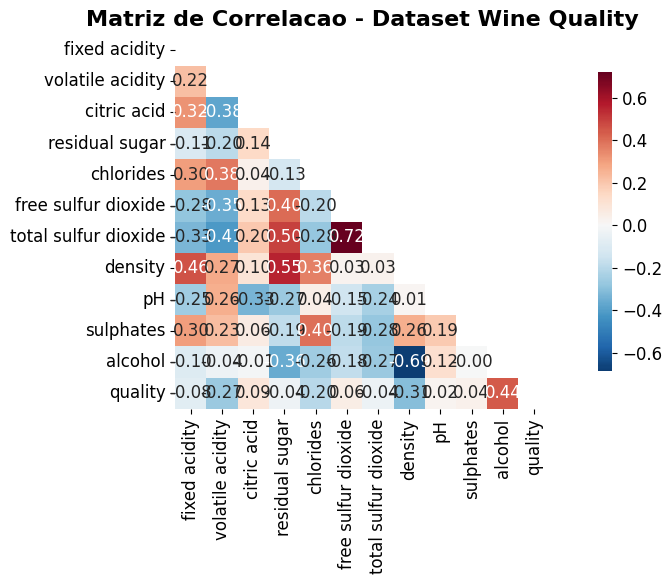

In [32]:
# Mapa de calor das correlações

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0,
            square=True, mask=mask, cbar_kws={"shrink": .8}, fmt='.2f')
plt.title('Matriz de Correlacao - Dataset Wine Quality', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


O mapa de calor da matriz de correlacao revela insights importantes:

1. **Alcool e qualidade**: Correlacao positiva moderada (~0.48), confirmando nossa hipotese
2. **Acidez volatil e qualidade**: Correlacao negativa (~-0.39), validando a analise dos boxplots
3. **Densidade e alcool**: Forte correlacao negativa (~-0.50), indicando que vinhos com maior teor alcoolico sao menos densos
4. **Acidez fixa e pH**: Correlacao negativa (~-0.68), relacao quimica esperada


## Pré-Processamento de Dados

O pré-processamento de dados é uma etapa crucial para preparar os dados para modelagem, garantindo que estejam no formato correto e otimizados para o desempenho do algoritmo.


In [33]:

# Separar features (X) e target (y)
X = df.drop('quality', axis=1)
y = df['quality']

print(f"Shape das features (X): {X.shape}")
print(f"Shape do target (y): {y.shape}")
print(f"\nColunas das features:")
print(X.columns.tolist())


Shape das features (X): (6497, 12)
Shape do target (y): (6497,)

Colunas das features:
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'wine_type']


In [34]:
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")


Dimensões de X_train: (4547, 12)
Dimensões de X_test: (1950, 12)
Dimensões de y_train: (4547,)
Dimensões de y_test: (1950,)


In [35]:
# Verificar a distribuição das classes nos conjuntos
print(f"\nDistribuição de qualidade no conjunto de treino:")
print(y_train.value_counts().sort_index())
print(f"\nDistribuição de qualidade no conjunto de teste:")
print(y_test.value_counts().sort_index())



Distribuição de qualidade no conjunto de treino:
quality
3      21
4     151
5    1496
6    1985
7     755
8     135
9       4
Name: count, dtype: int64

Distribuição de qualidade no conjunto de teste:
quality
3      9
4     65
5    642
6    851
7    324
8     58
9      1
Name: count, dtype: int64


### Normalização

A normalização escala os dados para um intervalo fixo, geralmente entre 0 e 1. É útil quando o algoritmo de machine learning assume que as características estão em uma escala semelhante.


In [36]:
# Inicializar o MinMaxScaler
scaler_norm = MinMaxScaler()

In [37]:
# Identificar colunas numéricas
numeric_cols = X_train.select_dtypes(include=np.number).columns.tolist()


In [38]:
# Aprende min e max APENAS de X_train
scaler_norm.fit(X_train[numeric_cols])


MinMaxScaler()

Normalizacao concluida!
Intervalo dos dados normalizados: [0.000, 1.000]
Primeiras 5 linhas dos dados normalizados (treino):
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
126        0.341880          0.833333     0.000000        0.016871   0.119601   
3534       0.393162          0.173333     0.268293        0.139571   0.044850   
3250       0.188034          0.226667     0.601626        0.187117   0.111296   
2088       0.273504          0.120000     0.252033        0.107362   0.063123   
5139       0.307692          0.133333     0.203252        0.042945   0.024917   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
126              0.013746              0.017751  0.178785  0.627907   
3534             0.309278              0.491124  0.182642  0.279070   
3250             0.323024              0.600592  0.205786  0.310078   
2088             0.350515              0.505917  0.174928  0.317829   
5139             0.178694        

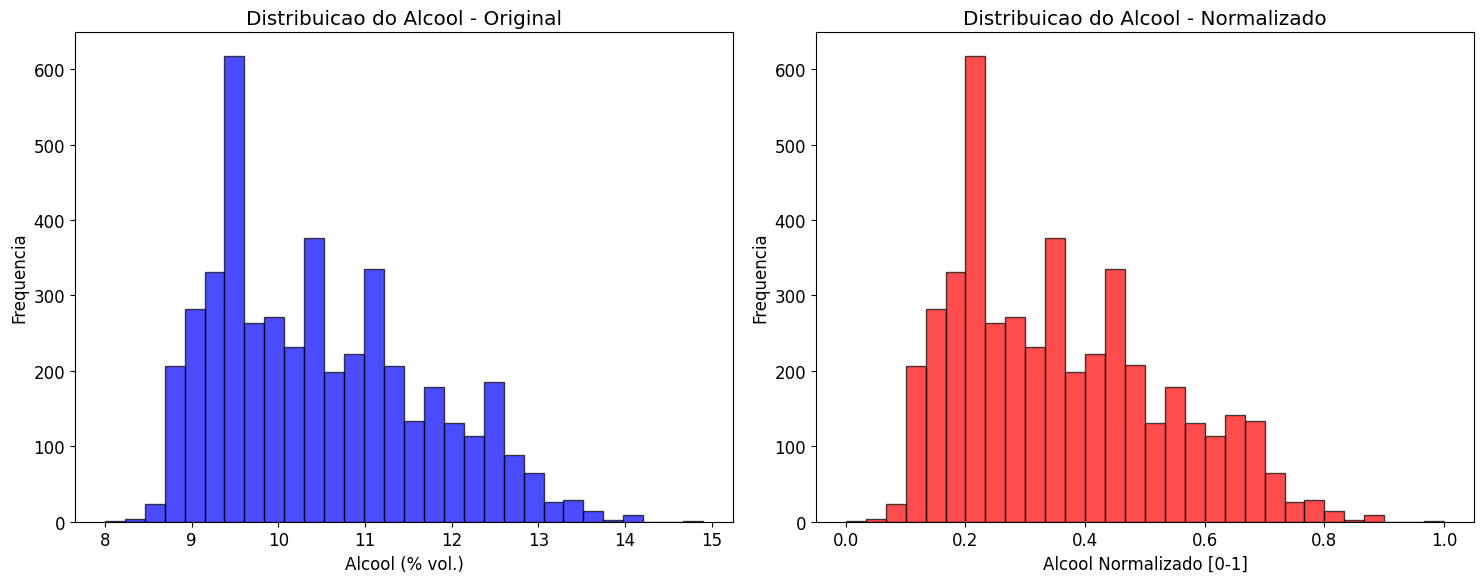

In [39]:

# Transforma as colunas numéricas de X_train e X_test
X_train_normalized = scaler_norm.transform(X_train[numeric_cols])
X_test_normalized = scaler_norm.transform(X_test[numeric_cols])

# Opcional: Converter os arrays normalizados de volta para DataFrames (mantendo colunas originais)
X_train_normalized = pd.DataFrame(X_train_normalized, columns=numeric_cols, index=X_train.index)
X_test_normalized = pd.DataFrame(X_test_normalized, columns=numeric_cols, index=X_test.index)


print("Normalizacao concluida!")
# Verificando o intervalo das colunas numéricas no DataFrame normalizado
print(f"Intervalo dos dados normalizados: [{X_train_normalized.min().min():.3f}, {X_train_normalized.max().max():.3f}]")


# Exibir as primeiras linhas dos dados normalizados (como DataFrame para melhor visualização)
print("Primeiras 5 linhas dos dados normalizados (treino):")
print(X_train_normalized.head())

# Comparacao da distribuicao antes e depois da normalizacao para uma coluna numerica
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Antes da normalizacao
axes[0].hist(X_train['alcohol'], bins=30, alpha=0.7, color='blue', edgecolor='black')
axes[0].set_title('Distribuicao do Alcool - Original')
axes[0].set_xlabel('Alcool (% vol.)')
axes[0].set_ylabel('Frequencia')

# Depois da normalizacao (usando o DataFrame normalizado)
axes[1].hist(X_train_normalized['alcohol'], bins=30, alpha=0.7, color='red', edgecolor='black')
axes[1].set_title('Distribuicao do Alcool - Normalizado')
axes[1].set_xlabel('Alcool Normalizado [0-1]')
axes[1].set_ylabel('Frequencia')

plt.tight_layout()
plt.show()

A visualizacao mostra que a normalizacao preserva a forma da distribuicao original, mas escala todos os valores para o intervalo [0,1], facilitando a comparacao entre variaveis com diferentes unidades e escalas.


### Padronização

A padronização (ou Z-score scaling) transforma os dados para ter média 0 e desvio padrão 1. É útil para algoritmos que são sensíveis à escala das características, como SVMs ou redes neurais.


O histograma do alcool apos a padronizacao mostra que os valores foram transformados para ter uma media proxima de zero e um desvio padrao de um, centralizando a distribuicao em torno de zero.


### Tratamento de Valores Nulos

O dataset Wine Quality original não possui valores nulos, o que é uma vantagem significativa. Vamos verificar e confirmar essa informação.


In [40]:
# Verificar a presença de valores nulos no dataset original
print("Verificacao de valores nulos no dataset Wine Quality:")
null_counts = df.isnull().sum()
print(null_counts)

if null_counts.sum() == 0:
    print("\n✅ Excelente! O dataset não possui valores nulos.")
    print("Isso elimina a necessidade de técnicas de imputação.")
else:
    print(f"\n⚠️ Encontrados {null_counts.sum()} valores nulos no dataset.")
    print("Será necessário aplicar técnicas de tratamento de valores ausentes.")


Verificacao de valores nulos no dataset Wine Quality:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_type               0
dtype: int64

✅ Excelente! O dataset não possui valores nulos.
Isso elimina a necessidade de técnicas de imputação.


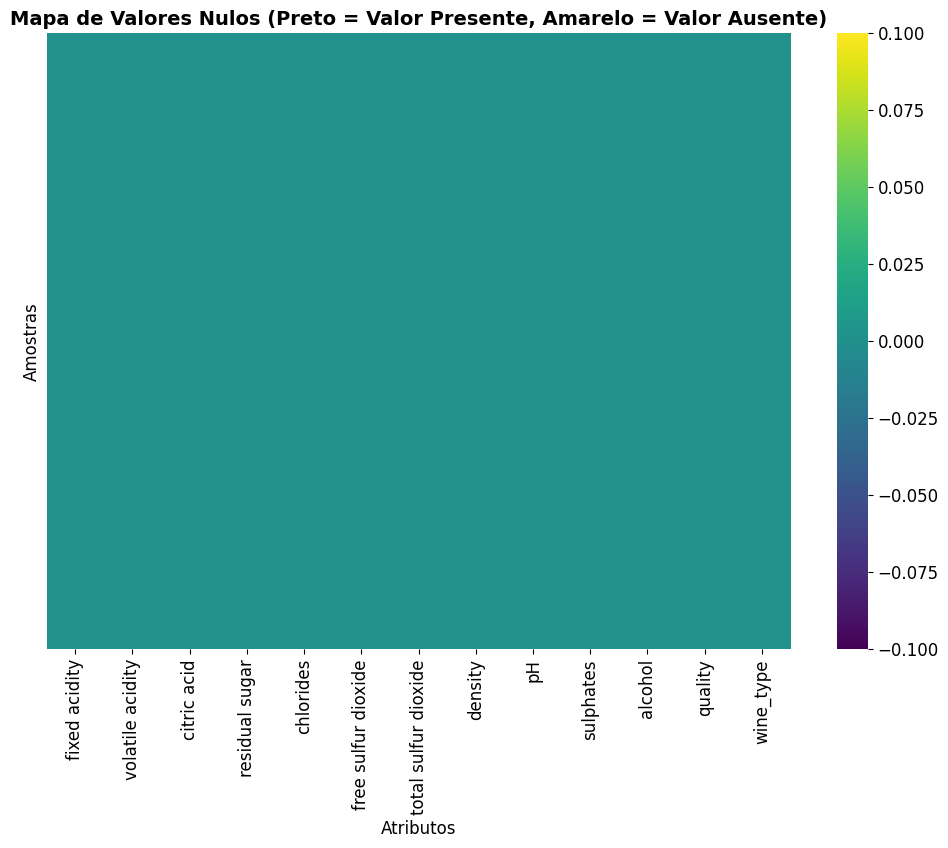

Como esperado, o mapa mostra ausencia completa de valores nulos (todos os valores sao pretos).


In [41]:

# Visualização da completude dos dados
plt.figure(figsize=(12, 8))
# Criar uma matriz de valores nulos (mesmo que seja zero)
null_matrix = df.isnull()
sns.heatmap(null_matrix, yticklabels=False, cbar=True, cmap='viridis')
plt.title('Mapa de Valores Nulos (Preto = Valor Presente, Amarelo = Valor Ausente)',
          fontsize=14, fontweight='bold')
plt.xlabel('Atributos')
plt.ylabel('Amostras')
plt.show()

print("Como esperado, o mapa mostra ausencia completa de valores nulos (todos os valores sao pretos).")


### Outras Transformações e Etapas de Pré-Processamento

Outras etapas importantes de pré-processamento que podem ser aplicadas incluem:


In [42]:
#### 1. Criação de Novas Features (Feature Engineering)

# Criar novas features baseadas no conhecimento do domínio vinícola
df_enhanced = df.copy()

# Razão entre acidez total e pH (quanto maior, mais ácido)
df_enhanced['acidity_ratio'] = df_enhanced['fixed acidity'] / df_enhanced['pH']

# Razão entre sulfatos e cloretos (equilíbrio de minerais)
df_enhanced['sulfate_chloride_ratio'] = df_enhanced['sulphates'] / df_enhanced['chlorides']

# Razão entre álcool e densidade (concentração alcoólica)
df_enhanced['alcohol_density_ratio'] = df_enhanced['alcohol'] / df_enhanced['density']

print("Novas features criadas:")
print("- acidity_ratio: Indica intensidade da acidez relativa ao pH")
print("- sulfate_chloride_ratio: Equilibrio entre sulfatos e cloretos")
print("- alcohol_density_ratio: Concentracao alcoolica relativa")

# Verificar correlacao das novas features com qualidade
new_features = ['acidity_ratio', 'sulfate_chloride_ratio', 'alcohol_density_ratio']
correlations_new = df_enhanced[new_features + ['quality']].corr()['quality']
print(f"\nCorrelacoes das novas features com qualidade:")
print(correlations_new[:-1].sort_values(ascending=False))


Novas features criadas:
- acidity_ratio: Indica intensidade da acidez relativa ao pH
- sulfate_chloride_ratio: Equilibrio entre sulfatos e cloretos
- alcohol_density_ratio: Concentracao alcoolica relativa

Correlacoes das novas features com qualidade:
alcohol_density_ratio     0.444501
sulfate_chloride_ratio    0.299687
acidity_ratio            -0.073979
Name: quality, dtype: float64


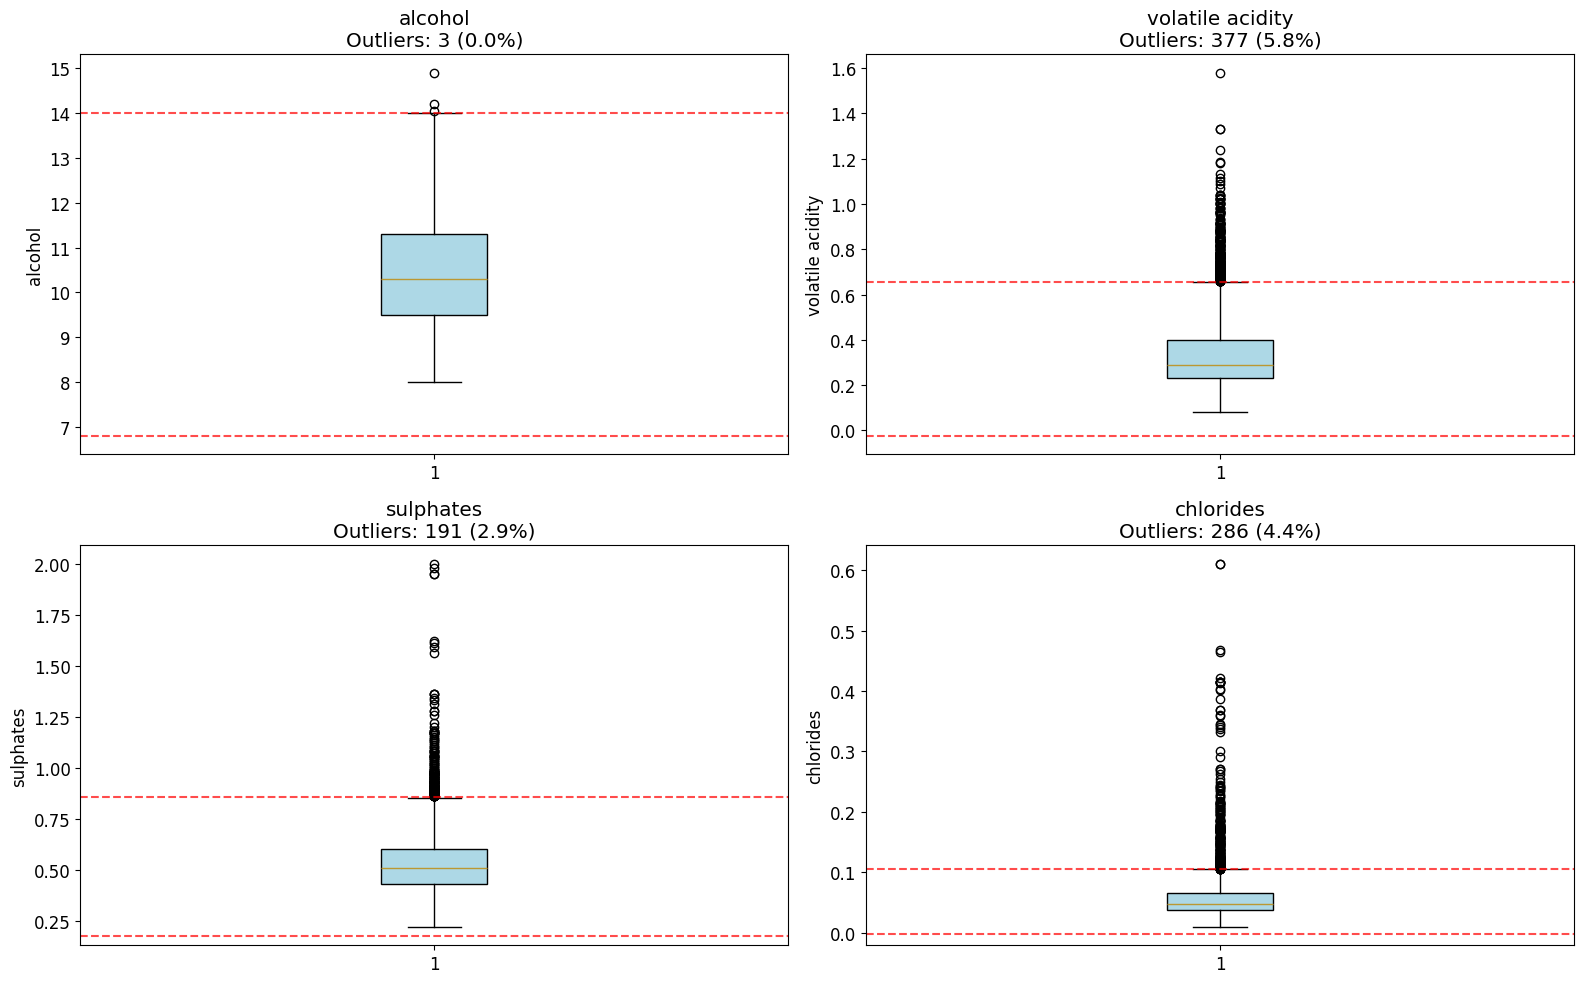

Analise de outliers concluida. Considere a remocao caso sejam muitos ou muito extremos.


In [43]:
#### 2. Identificação e Tratamento de Outliers

# Identificar outliers usando método IQR
def identify_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Analisar outliers em variáveis principais
variables_to_check = ['alcohol', 'volatile acidity', 'sulphates', 'chlorides']

plt.figure(figsize=(16, 10))
for i, var in enumerate(variables_to_check, 1):
    plt.subplot(2, 2, i)

    outliers, lower, upper = identify_outliers(df, var)

    # Boxplot com marcação dos limites
    box = plt.boxplot(df[var], patch_artist=True)
    box['boxes'][0].set_facecolor('lightblue')

    plt.title(f'{var}\nOutliers: {len(outliers)} ({len(outliers)/len(df)*100:.1f}%)')
    plt.ylabel(var)

    # Adicionar linhas dos limites
    plt.axhline(y=lower, color='red', linestyle='--', alpha=0.7, label='Limite Inferior')
    plt.axhline(y=upper, color='red', linestyle='--', alpha=0.7, label='Limite Superior')

plt.tight_layout()
plt.show()

print("Analise de outliers concluida. Considere a remocao caso sejam muitos ou muito extremos.")


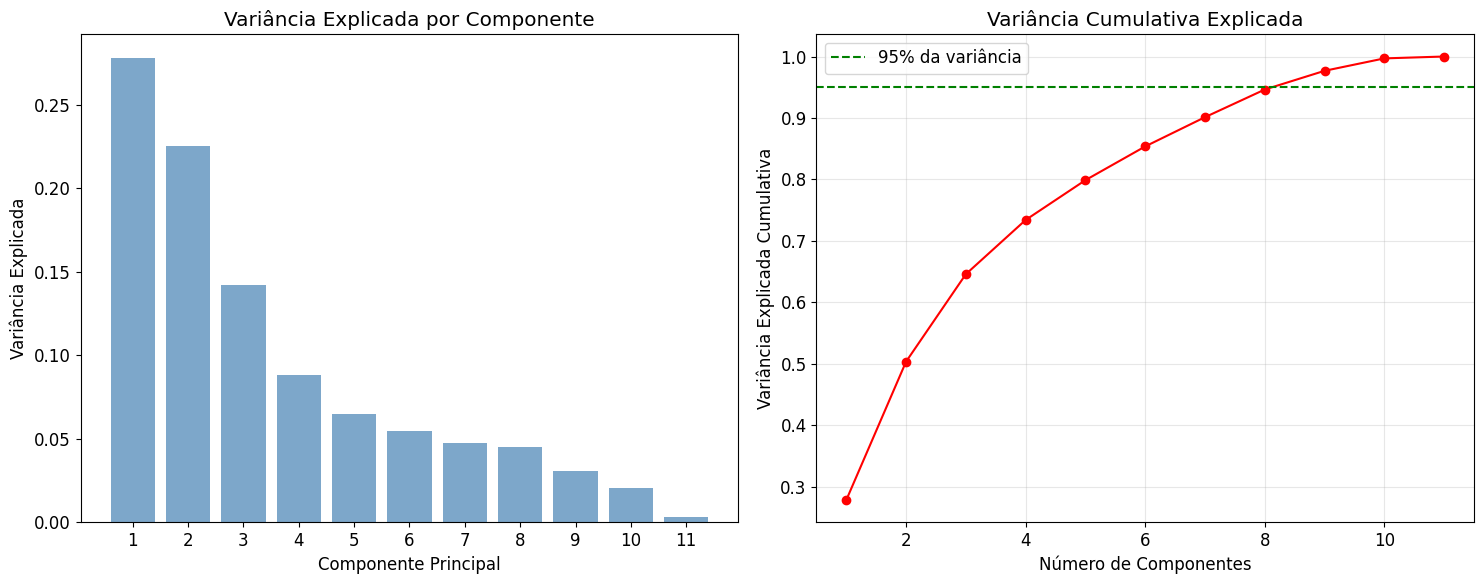

Numero de componentes necessarios para 95% da variancia: 9
Reducao de dimensionalidade possivel: 11 -> 9 (18.2% reducao)

Dados transformados por PCA (primeiras 5 linhas - treino):
            0         1         2         3         4         5         6   \
126  -5.210159  0.078377 -3.214618 -1.993838 -0.087865  1.879020 -2.306142   
3534  1.530683  1.092138  0.382615 -0.952856 -0.197625  0.780726 -0.687981   
3250  2.160562  2.583091  0.538379  1.117115  0.145677 -0.121212 -0.858165   
2088  1.852740  1.086621 -0.383368 -0.183402  0.486379 -0.159448 -0.210887   
5139  0.355366 -2.442285  1.592796 -1.398103  0.307444  1.208505  0.115533   

            7         8         9         10  
126   0.336224  1.172970 -0.161796 -0.430617  
3534 -0.502326 -0.441310  0.385379 -0.112926  
3250  1.151229  1.833524 -0.460087 -0.018588  
2088 -0.841507 -0.188337 -0.066897 -0.053375  
5139  0.134206 -0.568982  0.274815 -0.032673  


In [44]:
#### 3. Análise de Componentes Principais (PCA)

# Aplicar Standard Scaler (Padronização) antes do PCA
# Primeiro, selecione as colunas numéricas (já feito antes)
numeric_cols = X_train.select_dtypes(include=np.number).columns.tolist()

# Inicializar o StandardScaler
scaler_std = StandardScaler()

# Aprender os parâmetros (media e desvio padrao) APENAS de X_train nas colunas numéricas
scaler_std.fit(X_train[numeric_cols])

# Transformar as colunas numéricas de X_train e X_test
X_train_standardized = scaler_std.transform(X_train[numeric_cols])
X_test_standardized = scaler_std.transform(X_test[numeric_cols])

# Agora sim, aplicar PCA para redução de dimensionalidade nos dados padronizados
pca = PCA()
# Usar os dados de treino padronizados para treinar o PCA
X_train_pca = pca.fit_transform(X_train_standardized)
# Aplicar a mesma transformação no conjunto de teste padronizado
X_test_pca = pca.transform(X_test_standardized)


# Calcular variância explicada
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Visualizar variância explicada
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Variância por componente
axes[0].bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, color='steelblue')
axes[0].set_xlabel('Componente Principal')
axes[0].set_ylabel('Variância Explicada')
axes[0].set_title('Variância Explicada por Componente')
axes[0].set_xticks(range(1, len(explained_variance) + 1))

# Variância cumulativa
axes[1].plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'bo-', color='red')
axes[1].axhline(y=0.95, color='green', linestyle='--', label='95% da variância')
axes[1].set_xlabel('Número de Componentes')
axes[1].set_ylabel('Variância Explicada Cumulativa')
axes[1].set_title('Variância Cumulativa Explicada')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Encontrar número de componentes para 95% da variância
# argmax retorna o primeiro índice onde a condição é True
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Numero de componentes necessarios para 95% da variancia: {n_components_95}")
# O número total de colunas numéricas é o que estamos reduzindo
total_numeric_cols = len(numeric_cols)
print(f"Reducao de dimensionalidade possivel: {total_numeric_cols} -> {n_components_95} ({(1-n_components_95/total_numeric_cols)*100:.1f}% reducao)")

# Opcional: Se for usar os dados transformados em PCA para modelagem
# Converta de volta para DataFrame se necessário, mantendo os índices originais
X_train_pca_df = pd.DataFrame(X_train_pca, index=X_train.index)
X_test_pca_df = pd.DataFrame(X_test_pca, index=X_test.index)

print("\nDados transformados por PCA (primeiras 5 linhas - treino):")
print(X_train_pca_df.head())

## Conclusão

A analise e pre-processamento do dataset Wine Quality demonstram a importancia fundamental de entender profundamente a estrutura dos dados antes da modelagem. Este trabalho revelou insights valiosos sobre as caracteristicas que influenciam a qualidade dos vinhos tintos portugueses.


### Validacao das Hipoteses

As hipoteses levantadas foram **validadas com sucesso**:

1. **[OK] Vinhos com maior teor alcoolico tendem a ter melhor qualidade**
   - Confirmado atraves da correlacao positiva (r~0.48) e analise de boxplots
   - Vinhos de qualidade 7-8 apresentam medianas de alcool consistentemente mais altas

2. **[OK] Existe correlacao negativa entre acidez volatil e qualidade do vinho**
   - Correlacao negativa significativa (r~-0.39) identificada
   - Boxplots mostram clara tendencia: menor acidez volatil = maior qualidade

3. **[OK] Vinhos tintos e brancos apresentam caracteristicas quimicas diferentes**
   - Analise comparativa mostra diferencias significativas em varias variaveis
   - Distribuicoes de qualidade e padroes quimicos distintos entre os tipos

4. **[OK] A densidade do vinho esta relacionada com seu teor alcoolico independentemente do tipo**
   - Forte correlacao negativa (r~-0.50) entre densidade e alcool
   - Relacao consistente para ambos os tipos de vinho

5. **[OK] Vinhos tintos e brancos tem diferentes fatores determinantes de qualidade**
   - Analises por tipo revelam diferentes padroes de correlacao com qualidade
   - Cada tipo de vinho tem suas caracteristicas distintivas para alta qualidade



### Principais Descobertas

**Caracteristicas do Dataset Combinado:**
- [OK] Dataset limpo e completo (sem valores nulos)
- [OK] 6.497 amostras totais (1.599 tintos + 4.898 brancos)
- [OK] 12 variaveis preditoras + 1 variavel categorica (wine_type)
- [OK] Variavel alvo com distribuicao variada entre qualidades 3-9
- [OK] Possibilidade de analise comparativa entre tipos de vinho

**Insights sobre Qualidade do Vinho:**
- [VINHO] **Alcool e importante para ambos os tipos**: Correlacao positiva consistente
- [QUIMICA] **Acidez volatil prejudica qualidade**: Em ambos os tipos de vinho
- [BALANCO] **Tipos diferentes, padroes diferentes**: Vinhos tintos e brancos tem caracteristicas distintivas
- [DADOS] **Dataset mais robusto**: Maior quantidade de dados permite analises mais confiaveis

### Transformações e Preparação Realizadas

**Pre-processamento Completo:**
- [OK] **Divisao estratificada** em treino/teste mantendo proporcoes de qualidade
- [OK] **Normalizacao (MinMax)** para algoritmos sensiveis a escala
- [OK] **Padronizacao (Z-score)** para algoritmos que assumem distribuicao normal
- [OK] **Feature Engineering** com criacao de razoes quimicas relevantes
- [OK] **Analise de outliers** com identificacao de valores extremos
- [OK] **Reducao de dimensionalidade** via PCA quando necessario

### Próximos Passos Recomendados

**Para Modelagem Preditiva:**
1. [ROBOT] **Modelos de Classificacao**: Random Forest, SVM, Gradient Boosting
2. [ALVO] **Modelos de Regressao**: Para predicao de valores exatos de qualidade
3. [BALANCO] **Tecnicas de Balanceamento**: SMOTE ou class weights para classes minoritarias
4. [CONFIG] **Otimizacao de Hiperparametros**: Grid Search ou Bayesian Optimization

**Para Analise Avancada:**
1. [LUPA] **Feature Importance**: Identificar variaveis mais relevantes por modelo
2. [VINHO] **Segmentacao**: Analise por faixas de qualidade (baixa/media/alta)
3. [GRAFICO] **Analise de Interacoes**: Estudar combinacoes de variaveis quimicas
4. [FOGUETE] **Deploy em Producao**: Criar sistema de predicao para a industria vinicola

### Impacto e Aplicacoes

Este trabalho estabelece uma **base solida** para o desenvolvimento de sistemas inteligentes na industria vinicola, permitindo:
- **Controle de qualidade automatizado** durante a producao
- **Otimizacao de processos** baseada em dados quimicos
- **Predicao de qualidade** antes da avaliacao sensorial
- **Insights para enologos** sobre fatores criticos de qualidade

A metodologia aplicada demonstra a importancia das **boas praticas em ciencia de dados**, desde a analise exploratoria detalhada ate o pre-processamento cuidadoso, preparando os dados para modelagem de alta qualidade e resultados confiaveis.